In [1]:
import arff
import numpy as np
import pandas as pd
import os
import subprocess
import matplotlib.pyplot as plt
import re
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv('/home/veerlosar/Desktop/df.csv', encoding='utf-8')
#Unnamed column csv 
df1.head()

,Unnamed: 0,name,frameTime,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,class
0,0,liveturn_0,0.0125,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,...,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848,0.0
1,1,liveturn_0,0.0125,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,...,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777,0.0
2,2,liveturn_0,0.0125,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,...,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269,0.0
3,3,liveturn_0,0.0125,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,...,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453,0.0
4,4,liveturn_0,0.0125,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,...,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127,0.0


In [3]:
print(list(df1).index('name'))
print(list(df1).index('frameTime'))
print(list(df1).index('F0_sma_min'))
print(list(df1).index('F0env_sma_minPos'))
print(list(df1).index('class'))

1
2
460
482
991


In [4]:
y = df1['class']

In [5]:
df = df1.drop(['class', 'Unnamed: 0', 'name', 'frameTime', 'F0_sma_min', 'F0env_sma_minPos'], axis=1)
df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,1.749059e-07,3.226129e-07,2.786802e-13,...,40.03075,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848
1,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,1.067552e-05,9.873559e-06,1.916103e-10,...,40.60280,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777
2,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,1.181600e-06,7.439365e-07,1.100044e-12,...,121.68250,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269
3,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,4.778168e-06,2.955321e-06,5.902146e-11,...,43.28719,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453
4,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,2.210803e-06,1.461222e-06,5.422089e-12,...,41.56385,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127


In [6]:
'''
from scipy.stats import zscore

df = df.astype('float64').apply(zscore)
df.head()
'''
df1.drop(['Unnamed: 0', 'name', 'frameTime', 'F0_sma_min', 'F0env_sma_minPos'], axis=1, inplace=True)
df1.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,class
0,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,1.749059e-07,3.226129e-07,2.786802e-13,...,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848,0.0
1,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,1.067552e-05,9.873559e-06,1.916103e-10,...,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777,0.0
2,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,1.181600e-06,7.439365e-07,1.100044e-12,...,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269,0.0
3,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,4.778168e-06,2.955321e-06,5.902146e-11,...,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453,0.0
4,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,2.210803e-06,1.461222e-06,5.422089e-12,...,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127,0.0


In [6]:
df.describe()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
count,2.266000e+03,2.266000e+03,2.266000e+03,2266.000000,2266.000000,2.266000e+03,2.266000e+03,2.266000e+03,2.266000e+03,2.266000e+03,...,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000
mean,1.298796e-05,1.606254e-11,1.298794e-05,108.894969,20.018094,1.103861e-06,-1.527429e-09,1.258525e-06,1.283552e-06,1.270703e-11,...,64.493616,8.022010,3.396537,21.379906,-0.949621,0.034556,1.548981,0.984178,1.514424,2.498602
std,1.969487e-05,9.674284e-11,1.969484e-05,61.980624,60.106264,1.529538e-06,9.999467e-09,1.946976e-06,1.794478e-06,3.512191e-11,...,27.900667,1.802730,1.269428,9.848397,1.003634,0.226832,1.429007,0.969754,1.373135,2.113440
min,3.140372e-09,0.000000e+00,3.140372e-09,18.000000,0.000000,1.629041e-10,-1.363929e-07,-6.102262e-07,2.370709e-10,1.933554e-19,...,7.833272,2.804698,-0.478410,2.613530,-6.806335,-1.049957,0.000000,0.000000,0.000000,0.000000
25%,1.254313e-06,0.000000e+00,1.254313e-06,54.000000,0.000000,1.069736e-07,-2.240425e-09,9.173569e-08,1.133538e-07,3.733212e-14,...,42.547465,6.711412,2.574128,14.633085,-1.464689,0.000000,0.422210,0.264489,0.449196,0.892692
50%,4.414417e-06,0.000000e+00,4.414417e-06,107.000000,0.000000,4.486150e-07,-2.549616e-11,4.033889e-07,4.786407e-07,5.479644e-13,...,60.276185,7.945238,3.584701,20.909230,-0.628609,0.000000,1.179805,0.753186,1.216105,2.257393
75%,1.662450e-05,1.812410e-12,1.662450e-05,153.000000,0.000000,1.485432e-06,3.869026e-10,1.643726e-06,1.698194e-06,7.267741e-12,...,85.179210,9.455861,4.193173,25.799405,-0.142358,0.000000,2.359668,1.459107,2.242447,3.434610
max,1.897774e-04,2.033977e-09,1.897774e-04,314.000000,423.000000,1.047753e-05,9.168649e-08,2.288928e-05,1.248537e-05,6.438164e-10,...,162.957800,12.889900,8.061347,75.051130,0.000000,1.923746,10.174220,7.060971,10.075370,14.432120


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.18, random_state=42)

In [8]:
X_test.isnull().sum().sum()

0

In [9]:
#feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

selector = SelectKBest(score_func=f_classif, k=10).fit(X_train, y_train)
ranking = np.argsort(selector.scores_)[::-1]
print('Top-10 features according to SelectKBest, f_classif: ')
print()
print('{}'.format(df.columns[ranking][0:11]))

Top-10 features according to SelectKBest, f_classif: 

Index(['F0env_sma_quartile2', 'F0_sma_quartile3', 'F0_sma_stddev',
       'F0env_sma_quartile3', 'F0env_sma_de_amean', 'F0env_sma_linregc1',
       'F0_sma_linregerrA', 'mfcc_sma[1]_quartile3', 'mfcc_sma[12]_max',
       'F0_sma_linregerrQ', 'mfcc_sma[12]_linregerrQ'],
      dtype='object')


In [127]:
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


clf = RandomForestClassifier(n_estimators=250, max_depth=10,
                             random_state=0)
clf.fit(X_train, y_train)
y_pred_clf_test = clf.predict(X_test)
y_pred_clf_train = clf.predict(X_train)

In [10]:
print(accuracy_score(y_test, y_pred_clf_test)) #no pca for random forest

0.9313725490196079


In [36]:
from sklearn import svm


svm_ = svm.SVC(kernel='linear') 
svm_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
#v = dict()
t = dict()
for i in range(10, 986, 5):
    std_pca_svm_ = make_pipeline(StandardScaler(), PCA(n_components=i), svm_)
    std_pca_svm_.fit(X_train, y_train)
    t[i] = accuracy_score(y_train, std_pca_svm_.predict(X_train))

In [40]:
svm_pipeline = make_pipeline(StandardScaler(), PCA(n_components=230), svm_)
svm_pipeline.fit(X_train, y_train)
print(accuracy_score(y_test, svm_pipeline.predict(X_test)))

0.9240196078431373


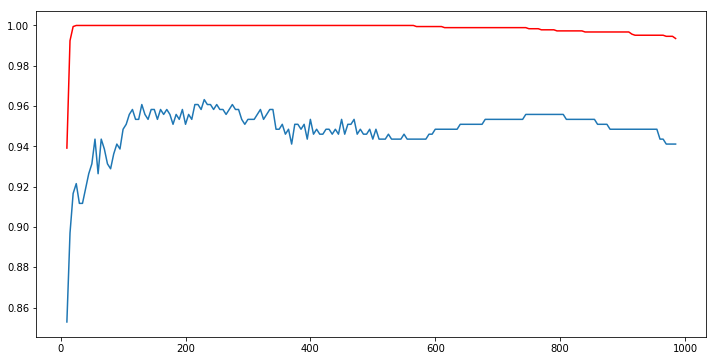

In [41]:
plt.figure(figsize=(12,6))
plt.plot(v.keys(), v.values())
plt.plot(t.keys(), t.values(), color='red')
plt.show()

In [13]:
df.head()

,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,pcm_intensity_sma_linregerrA,pcm_intensity_sma_linregerrQ,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3
0,0.000004,0.000000e+00,0.000004,174.0,0.0,2.218332e-07,2.450513e-10,1.749059e-07,3.226129e-07,2.786802e-13,...,40.03075,6.370962,4.146805,33.05245,0.000000,0.000000,0.000848,0.000000,0.000848,0.000848
1,0.000096,3.670129e-11,0.000096,31.0,0.0,9.256620e-06,-1.603280e-08,1.067552e-05,9.873559e-06,1.916103e-10,...,40.60280,6.743749,3.824213,20.90758,-1.434491,0.000000,1.472285,1.434491,1.472285,2.906777
2,0.000005,0.000000e+00,0.000005,22.0,0.0,6.583028e-07,-6.342996e-09,1.181600e-06,7.439365e-07,1.100044e-12,...,121.68250,11.289060,3.723004,20.17166,-2.912331,-1.048251,2.488938,1.864079,3.537189,5.401269
3,0.000068,0.000000e+00,0.000068,41.0,0.0,2.348227e-06,-2.492247e-08,4.778168e-06,2.955321e-06,5.902146e-11,...,43.28719,6.847570,3.738633,20.65178,-0.923669,0.000000,0.292783,0.923669,0.292783,1.216453
4,0.000013,4.531024e-11,0.000013,107.0,0.0,1.350536e-06,-7.928728e-09,2.210803e-06,1.461222e-06,5.422089e-12,...,41.56385,6.597148,3.341736,18.08254,-0.811553,0.000000,0.800573,0.811553,0.800573,1.612127


In [14]:
svm_.fit(X_train, y_train)
y_pred_svm_test = svm_.predict(X_test)
y_pred_svm_train = svm_.predict(X_train)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt_test = dt.predict(X_test)
y_pred_dt_train = dt.predict(X_train)

In [25]:
'''
too slow


ada_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),
    n_estimators=250,
    learning_rate=1.0)

ada_dt.fit(X_train, y_train)
y_pred_ada_dt_test = ada_dt.predict(X_test)
y_pred_ada_dt_train = ada_dt.predict(X_train)
'''

'\nada_dt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),\n    n_estimators=250,\n    learning_rate=1.0)\n\nada_dt.fit(X_train, y_train)\ny_pred_ada_dt_test = ada_dt.predict(X_test)\ny_pred_ada_dt_train = ada_dt.predict(X_train)\n'

In [16]:
from sklearn.svm import LinearSVC

lin_svm = LinearSVC(loss='squared_hinge', penalty='l1', dual=False)
lin_svm.fit(X_train, y_train)
y_pred_lin_svm_test = lin_svm.predict(X_test)
y_pred_lin_svm_train = lin_svm.predict(X_train)

In [17]:
#accuracy without scaling and pca

print('Random Forests: ', accuracy_score(y_test, y_pred_clf_test), accuracy_score(y_train, y_pred_clf_train))
print('Kernel SVM: ', accuracy_score(y_test, y_pred_svm_test), accuracy_score(y_train, y_pred_svm_train), 
      svm_.score(X_test, y_test))
print('Decision Tree: ', accuracy_score(y_test, y_pred_dt_test), accuracy_score(y_train, y_pred_dt_train))
#print('Decision Tree with AdaBoost: ', accuracy_score(y_test, y_pred_ada_dt_test), accuracy_score(y_train, y_pred_ada_dt_train))
print('Linear SVM: ', accuracy_score(y_test, y_pred_lin_svm_test), accuracy_score(y_train, y_pred_lin_svm_train))

Random Forests:  0.9313725490196079 1.0
Kernel SVM:  0.8529411764705882 1.0 0.8529411764705882
Decision Tree:  0.8333333333333334 0.9768568353067815
Linear SVM:  0.8774509803921569 1.0


In [18]:
importances = clf.feature_importances_

print(list(importances).index(max(importances)), max(importances))

472 0.023543248445896607


In [19]:
indices = np.argsort(importances)[::-1]
top_10_features = df.columns[indices][0:11]
print(top_10_features)

Index(['F0_sma_iqr2-3', 'F0env_sma_quartile3', 'F0_sma_quartile3',
       'F0env_sma_iqr1-2', 'F0env_sma_quartile2', 'voiceProb_sma_iqr2-3',
       'F0env_sma_linregc1', 'F0_sma_iqr1-3', 'F0_sma_quartile2',
       'F0env_sma_de_amean', 'F0env_sma_quartile1'],
      dtype='object')


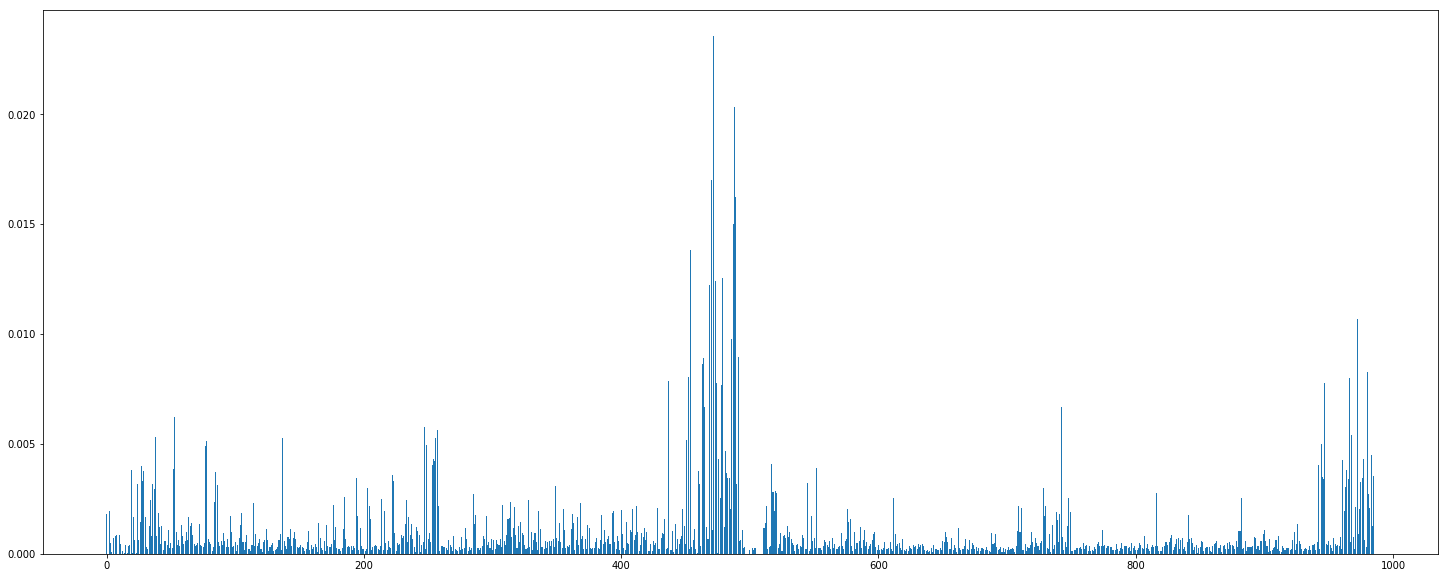

In [20]:
plt.figure(figsize=(25, 10))
plt.bar(indices, importances[indices])
plt.show()

In [21]:
def predict_new(filename, model):
    arff_file = arff.load(open('{}.arff'.format(filename[:-4]), 'r'))
    df = pd.DataFrame(np.array(arff_file['data']))
    df.drop([0, 1, 459, 481, 990], axis=1, inplace=True)
    print(model.predict(df))
    return df
      

In [26]:
from sklearn.metrics import confusion_matrix

preds = [y_pred_lin_svm_test, y_pred_dt_test, svm_pipeline.predict(X_test), y_pred_clf_test]

In [27]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[100   7   7   1]
 [  5  95   6   2]
 [  7   4  91   3]
 [  3   2   2  73]]


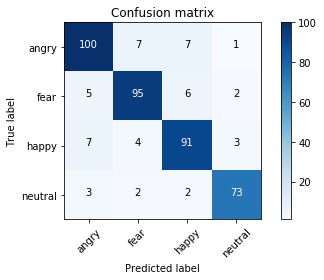

Confusion matrix, without normalization
[[91 10  8  6]
 [ 3 94 10  1]
 [10  5 85  5]
 [ 1  1  4 74]]


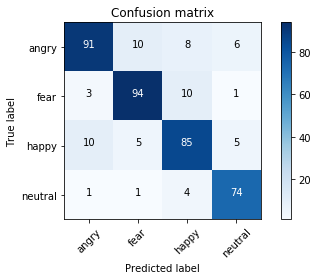

Confusion matrix, without normalization
[[110   1   2   2]
 [  2 106   0   0]
 [  5   0  96   4]
 [  0   0   0  80]]


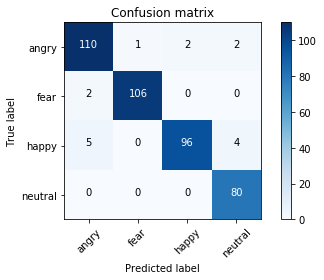

Confusion matrix, without normalization
[[106   1   6   2]
 [  1 100   5   2]
 [  4   3  94   4]
 [  0   0   0  80]]


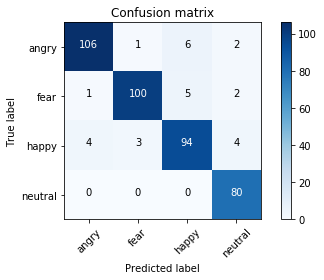

In [28]:
class_names = ['angry', 'fear', 'happy', 'neutral']
for i in preds:
    plt.figure()
    plot_confusion_matrix(confusion_matrix(y_test, i), classes=class_names)

    plt.show()
    

In [66]:
d.values[0][472]

172.9988

In [68]:
#x = df1[df1['class'] == 2.].loc[1178:1180].drop(['class'], axis=1)

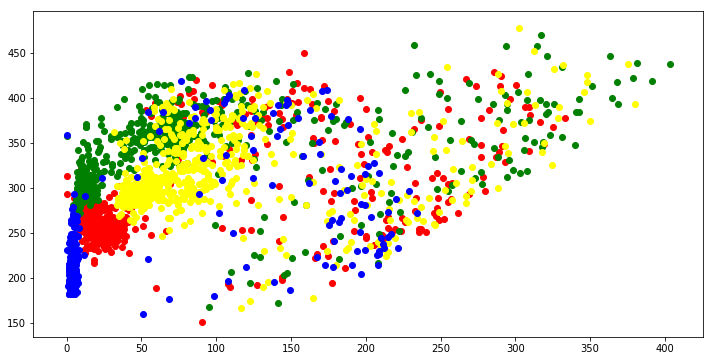

In [95]:
# :D 

colors = ['red', 'green', 'yellow', 'blue']
plt.figure(figsize=(12,6))

for i, color in enumerate(colors):
    plt.scatter(df1['F0_sma_iqr2-3'].loc[df1['class']==i], df1['F0env_sma_quartile3'].loc[df1['class']==i], color=color)



plt.show()


In [155]:
top_10_features

Index(['F0_sma_iqr2-3', 'F0env_sma_quartile3', 'F0_sma_quartile3',
       'F0env_sma_iqr1-2', 'F0env_sma_quartile2', 'voiceProb_sma_iqr2-3',
       'F0env_sma_linregc1', 'F0_sma_iqr1-3', 'F0_sma_quartile2',
       'F0env_sma_de_amean', 'F0env_sma_quartile1'],
      dtype='object')

In [113]:
df2 = df1.drop(df1.columns[:449], axis=1).drop(df1.columns[501:949], axis=1)
df3 = df1.drop(df1.columns[:449], axis=1).drop(df1.columns[501:], axis=1)

In [120]:
list(df1).index('voiceProb_sma_kurtosis')

449

In [114]:
df2.head()
X2_train, X2_test, y2_train, y2_test = train_test_split(df2, y, test_size=0.18, random_state=42)

In [160]:
print(X2_train.shape)
print(y2_train.shape)
X2_train.head()

(1858, 90)
(1858,)
449


,voiceProb_sma_kurtosis,voiceProb_sma_quartile1,voiceProb_sma_quartile2,voiceProb_sma_quartile3,voiceProb_sma_iqr1-2,voiceProb_sma_iqr2-3,voiceProb_sma_iqr1-3,F0_sma_max,F0_sma_range,F0_sma_maxPos,...,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr1-2,F0env_sma_de_iqr2-3,F0env_sma_de_iqr1-3,class
1476,1.658998,0.405925,0.629894,0.855835,0.223969,0.225942,0.449911,451.7140,451.7140,92.0,...,6.462430,4.599494,37.84061,-0.608618,0.000000,1.063464,0.608618,1.063464,1.672083,2.0
237,3.953094,0.663908,0.902648,0.937394,0.238740,0.034746,0.273486,305.3125,305.3125,109.0,...,6.370105,2.960923,12.78573,-1.516026,-0.465341,0.900918,1.050684,1.366259,2.416944,0.0
913,2.399393,0.510306,0.903204,0.945230,0.392898,0.042025,0.434923,430.4926,430.4926,19.0,...,9.182760,4.556118,26.21383,-0.089148,0.573305,2.061504,0.662453,1.488200,2.150652,1.0
651,3.235158,0.715919,0.941920,0.954102,0.226001,0.012182,0.238183,436.1607,436.1607,9.0,...,8.497443,5.118448,31.75650,-0.678542,0.274286,1.947498,0.952827,1.673212,2.626039,1.0
464,1.418535,0.262099,0.777501,0.898443,0.515402,0.120942,0.636344,350.6845,350.6845,79.0,...,6.700333,3.432747,19.74837,-0.648199,0.000000,1.310811,0.648199,1.310811,1.959010,0.0


In [1]:
clf.fit(X2_train, y2_train)
print(accuracy_score(y2_test, clf.predict(X2_test)))

NameError: name 'clf' is not defined

In [115]:
X3_train, X3_test, y3_train, y3_test = train_test_split(df3, y, test_size=0.18, random_state=42)

In [25]:
len(X2_train.columns)

90

In [25]:
df3.columns

Index(['voiceProb_sma_kurtosis', 'voiceProb_sma_quartile1',
       'voiceProb_sma_quartile2', 'voiceProb_sma_quartile3',
       'voiceProb_sma_iqr1-2', 'voiceProb_sma_iqr2-3', 'voiceProb_sma_iqr1-3',
       'F0_sma_max', 'F0_sma_range', 'F0_sma_maxPos', 'F0_sma_minPos',
       'F0_sma_amean', 'F0_sma_linregc1', 'F0_sma_linregc2',
       'F0_sma_linregerrA', 'F0_sma_linregerrQ', 'F0_sma_stddev',
       'F0_sma_skewness', 'F0_sma_kurtosis', 'F0_sma_quartile1',
       'F0_sma_quartile2', 'F0_sma_quartile3', 'F0_sma_iqr1-2',
       'F0_sma_iqr2-3', 'F0_sma_iqr1-3', 'F0env_sma_max', 'F0env_sma_min',
       'F0env_sma_range', 'F0env_sma_maxPos', 'F0env_sma_amean',
       'F0env_sma_linregc1', 'F0env_sma_linregc2', 'F0env_sma_linregerrA',
       'F0env_sma_linregerrQ', 'F0env_sma_stddev', 'F0env_sma_skewness',
       'F0env_sma_kurtosis', 'F0env_sma_quartile1', 'F0env_sma_quartile2',
       'F0env_sma_quartile3', 'F0env_sma_iqr1-2', 'F0env_sma_iqr2-3',
       'F0env_sma_iqr1-3', 'pcm_intensit

In [37]:
svm2_pipeline = make_pipeline(StandardScaler(), PCA(n_components=70), svm_)
svm2_pipeline.fit(X_train, y_train)
svm2_pipeline.predict(X_test)

array([0., 1., 0., 1., 1., 0., 1., 2., 1., 3., 1., 3., 2., 0., 2., 3., 1.,
       2., 0., 2., 0., 1., 3., 1., 0., 2., 2., 1., 3., 3., 0., 0., 1., 0.,
       1., 1., 3., 1., 3., 3., 2., 2., 2., 0., 0., 1., 0., 0., 0., 2., 2.,
       2., 0., 1., 2., 2., 2., 2., 0., 0., 2., 0., 2., 1., 2., 1., 0., 1.,
       1., 2., 1., 1., 2., 1., 2., 0., 2., 3., 3., 1., 3., 2., 3., 1., 3.,
       1., 0., 3., 2., 2., 0., 3., 3., 1., 1., 2., 1., 2., 2., 0., 3., 1.,
       1., 3., 1., 0., 0., 0., 1., 3., 1., 3., 1., 0., 0., 3., 2., 3., 0.,
       3., 2., 2., 3., 1., 1., 2., 0., 3., 3., 3., 2., 1., 0., 0., 3., 2.,
       3., 2., 1., 2., 2., 1., 3., 2., 0., 1., 1., 0., 2., 1., 0., 2., 3.,
       1., 0., 1., 2., 2., 0., 3., 1., 0., 3., 0., 0., 0., 1., 2., 1., 3.,
       0., 1., 2., 1., 0., 0., 1., 2., 3., 2., 1., 0., 3., 1., 3., 0., 1.,
       1., 1., 3., 0., 1., 1., 2., 2., 2., 0., 2., 1., 3., 1., 3., 0., 3.,
       2., 3., 0., 1., 0., 1., 0., 3., 0., 2., 2., 1., 0., 0., 1., 1., 0.,
       2., 3., 2., 2., 1.

In [38]:
print(accuracy_score(y_test, svm2_pipeline.predict(X_test)))

0.9044117647058824


In [38]:
print(accuracy_score(y_test, svm3_pipeline.predict(X_test)))

0.9313725490196079


In [40]:
clf_pipeline = make_pipeline(PCA(n_components=50), clf)
clf_pipeline.fit(X_train, y_train)
print(accuracy_score(y_test, clf_pipeline.predict(X_test)))

0.8627450980392157


In [41]:
predict_new('/home/veerlosar/Downloads/ERHS/neutral_maria2.wav', clf_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/neutral_lalit.wav', clf_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/happy_maria.wav', clf_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/happy_lalit.wav', clf_pipeline)

[1.]
[0.]
[1.]
[1.]


,2,3,4,5,6,7,8,9,10,11,...,980,981,982,983,984,985,986,987,988,989
0,1.039413e-06,1.243611e-11,1.039401e-06,186.0,6.0,3.641133e-08,-7.506724e-11,5.641675e-08,4.507358e-08,9.879246e-15,...,49.93483,7.098348,1.945231,14.46606,-0.7989274,0.0,2.023879,0.7989274,2.023879,2.822806


In [119]:
acc = dict()
cs = np.arange(0.25, 2.0, 0.10)
for c in cs:
    for n in range(2, 50, 4):
        svm4_pipeline = make_pipeline(StandardScaler(), PCA(n_components=n), svm.SVC(C=c, kernel='poly', degree=2))
        svm4_pipeline.fit(X3_train, y3_train)
        acc[(c, n)] = (accuracy_score(y3_test, svm4_pipeline.predict(X3_test)))

In [112]:
svm4_pipeline = make_pipeline(StandardScaler(), PCA(n_components=50), svm.SVC(C=1.0, kernel='poly', degree=2))
svm4_pipeline.fit(X_train, y_train)
print(accuracy_score(y_test, svm4_pipeline.predict(X_test)))

0.9313725490196079


In [111]:
predict_new('/home/veerlosar/Downloads/ERHS/angry_show.wav', svm4_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/neutral_maria2.wav', svm4_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/neutral_lalit.wav', svm4_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/happy_lalit.wav', svm4_pipeline)

[1.]
[1.]
[3.]
[2.]


,2,3,4,5,6,7,8,9,10,11,...,980,981,982,983,984,985,986,987,988,989
0,1.039413e-06,1.243611e-11,1.039401e-06,186.0,6.0,3.641133e-08,-7.506724e-11,5.641675e-08,4.507358e-08,9.879246e-15,...,49.93483,7.098348,1.945231,14.46606,-0.7989274,0.0,2.023879,0.7989274,2.023879,2.822806


In [41]:
predict_new('/home/veerlosar/Downloads/ERHS/angry_show.wav', svm_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/neutral_maria2.wav', svm_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/neutral_lalit.wav', svm_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/happy_maria.wav', svm_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/happy_lalit.wav', svm_pipeline)

[0.]
[1.]
[2.]
[1.]
[1.]


,2,3,4,5,6,7,8,9,10,11,...,980,981,982,983,984,985,986,987,988,989
0,1.039413e-06,1.243611e-11,1.039401e-06,186.0,6.0,3.641133e-08,-7.506724e-11,5.641675e-08,4.507358e-08,9.879246e-15,...,49.93483,7.098348,1.945231,14.46606,-0.7989274,0.0,2.023879,0.7989274,2.023879,2.822806


In [58]:
svmlin_pipeline = make_pipeline(StandardScaler(), PCA(n_components=50), lin_svm)
svmlin_pipeline.fit(X_train, y_train)
print(accuracy_score(y_test, svmlin_pipeline.predict(X_test)))

0.8848039215686274


In [39]:

predict_new('/home/veerlosar/Downloads/ERHS/angry_show.wav', svm2_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/neutral_maria2.wav', svm2_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/neutral_lalit.wav', svm2_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/happy_maria.wav', svm2_pipeline)
predict_new('/home/veerlosar/Downloads/ERHS/happy_lalit.wav', svm2_pipeline)

[0.]
[1.]
[2.]
[1.]
[2.]


,2,3,4,5,6,7,8,9,10,11,...,980,981,982,983,984,985,986,987,988,989
0,1.039413e-06,1.243611e-11,1.039401e-06,186.0,6.0,3.641133e-08,-7.506724e-11,5.641675e-08,4.507358e-08,9.879246e-15,...,49.93483,7.098348,1.945231,14.46606,-0.7989274,0.0,2.023879,0.7989274,2.023879,2.822806
